In [1]:
from Bio import SeqIO

import os
import fnmatch
import gffpandas.gffpandas as gffpd

import matplotlib.pyplot as plt
import numpy as np

In [2]:
annotation = gffpd.read_gff3('gff/10015.gff')

In [3]:
print(annotation.df)

           seq_id source  type  start   end score strand phase  \
0     tig00000074  maker  gene   2707  6575     .      -     .   
1     tig00000074  maker  mRNA   2707  6575     .      -     .   
2     tig00000074  maker  exon   5938  6575     .      -     .   
3     tig00000074  maker  exon   5778  5851     .      -     .   
4     tig00000074  maker  exon   4747  5765     .      -     .   
...           ...    ...   ...    ...   ...   ...    ...   ...   
4836  tig00000103  maker   CDS   3623  4261     .      +     0   
4837  tig00000103  maker  gene   3730  4080     .      -     .   
4838  tig00000103  maker  mRNA   3730  4080     .      -     .   
4839  tig00000103  maker  exon   3730  4080     .      -     .   
4840  tig00000103  maker   CDS   3730  4080     .      -     0   

                                             attributes  
0     ID=10015|G379;Alias=maker-tig00000074-snap-gen...  
1     ID=10015|T379-R1;Parent=10015|G379;Alias=maker...  
2               ID=10015|T379-R1:

In [4]:
df = annotation.df

In [5]:
df.head(30)

,seq_id,source,type,start,end,score,strand,phase,attributes
0,tig00000074,maker,gene,2707,6575,.,-,.,ID=10015|G379;Alias=maker-tig00000074-snap-gen...
1,tig00000074,maker,mRNA,2707,6575,.,-,.,ID=10015|T379-R1;Parent=10015|G379;Alias=maker...
2,tig00000074,maker,exon,5938,6575,.,-,.,ID=10015|T379-R1:7;Parent=10015|T379-R1
3,tig00000074,maker,exon,5778,5851,.,-,.,ID=10015|T379-R1:6;Parent=10015|T379-R1
4,tig00000074,maker,exon,4747,5765,.,-,.,ID=10015|T379-R1:5;Parent=10015|T379-R1
5,tig00000074,maker,exon,4355,4648,.,-,.,ID=10015|T379-R1:4;Parent=10015|T379-R1
6,tig00000074,maker,exon,3572,4192,.,-,.,ID=10015|T379-R1:3;Parent=10015|T379-R1
7,tig00000074,maker,exon,3051,3530,.,-,.,ID=10015|T379-R1:2;Parent=10015|T379-R1
8,tig00000074,maker,exon,2707,3033,.,-,.,ID=10015|T379-R1:1;Parent=10015|T379-R1
9,tig00000074,maker,CDS,5938,6575,.,-,0,ID=10015|T379-R1:cds;Parent=10015|T379-R1


In [6]:
exon_start_l = []
exon_end_l = []

gene_exon_start_l = []
gene_exon_end_l = []

geneStart = 2707
geneEnd = 6575

for ii in range(df.shape[0]):
    if df.iloc[ii]['seq_id'] == 'tig00000074':
        if df.iloc[ii]['type'] == 'exon':
            exon_start_l.append(df.iloc[ii]['start'])
# print(exon_start_l)
            exon_end_l.append(df.iloc[ii]['end'])
# print(exon_end_l)

for x in exon_start_l:
    if x >= geneStart and x <= geneEnd: 
        gene_exon_start_l.append(x)
# print(gene_exon_start_l)

for x in exon_end_l:
    if x >= geneStart and x <= geneEnd: 
        gene_exon_end_l.append(x)
# print(gene_exon_end_l)

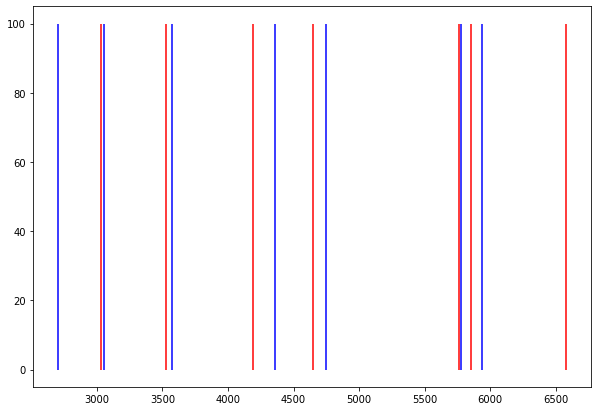

In [7]:
xs = [1, 100]

plt.figure(figsize = (10, 7))

plt.vlines(x = gene_exon_start_l, ymin = 0, ymax = max(xs),
           colors = 'blue',
           label = 'vline_multiple - full height')

plt.vlines(x = gene_exon_end_l, ymin = 0, ymax = max(xs),
           colors = 'red',
           label = 'vline_multiple - full height')

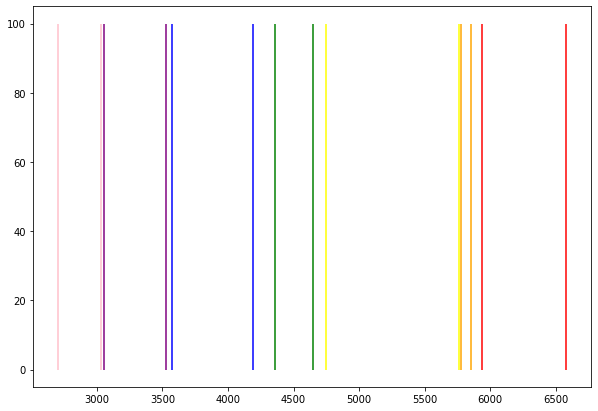

In [8]:
combined_l = []
for jj, end in enumerate(gene_exon_end_l):
    combined_l.append((gene_exon_start_l[jj], end))
# print(combined_l)

xs = [1, 100]

plt.figure(figsize = (10, 7))

plt.vlines(x = combined_l[0], ymin = 0, ymax = max(xs),
           colors = 'red',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[1], ymin = 0, ymax = max(xs),
           colors = 'orange',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[2], ymin = 0, ymax = max(xs),
           colors = 'yellow',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[3], ymin = 0, ymax = max(xs),
           colors = 'green',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[4], ymin = 0, ymax = max(xs),
           colors = 'blue',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[5], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[6], ymin = 0, ymax = max(xs),
           colors = 'pink',
           label = 'vline_multiple - full height')